In [ ]:
# ..... try integration with scib tools ..... #
# building with info from   https://scib.readthedocs.io/en/latest/api.html

In [1]:
# from pytorch_lightning.utilities.seed import seed_everything
import scgen
import scanpy as sc
import pandas as pd
import numpy as np

/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/suresh/miniforge3/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.experimen

In [2]:
adata = sc.read_h5ad("chicken_scVI2.h5ad")

In [3]:
scgen.SCGEN.setup_anndata(adata, batch_key="dataset", labels_key="consensus_type")

In [4]:
model = scgen.SCGEN(adata)

In [5]:
model.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=25,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/suresh/miniforge3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/home/suresh/miniforge3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Epoch 26/100:  26%|▎| 26/100 [53:58<2:33:37, 124.56s/it, v_num=1, train_loss_ste
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 4309.129. Signaling Trainer to stop.


In [8]:
%matplotlib inline

In [9]:
corrected_adata = model.batch_removal()
corrected_adata

AttributeError: 'NoneType' object has no attribute 'sqrt'

In [ ]:
sc.pp.neighbors(corrected_adata)
sc.tl.leiden(corrected_adata)
sc.tl.umap(corrected_adata)

In [ ]:
corrected_adata

In [ ]:
sc.pl.embedding(
    corrected_adata,
    basis='X_umap',
    color=["dataset", "leiden","consensus_type"],
    frameon=False,
    ncols=1,
)

In [ ]:
# save?
adata.write('chicken_scGEN_new2.h5ad')
np.savetxt('chicken_scGEN_embeddings_new2.csv', adata.obsm['X_umap'], delimiter=",")

In [45]:
alldata_corrected

AnnData object with n_obs × n_vars = 32722 × 2816
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'stage', 'sample', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet', 'dataset', 'Qiu_class', 'KS_class', '_scvi_batch', '_scvi_labels', 'concat_batch'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'latent', 'corrected_latent'

In [46]:
scanpy.pp.neighbors(alldata_corrected, use_rep="corrected_latent")
scanpy.tl.umap(alldata_corrected)
scanpy.tl.leiden(
    alldata_corrected, key_added="clusters", n_iterations=2
)

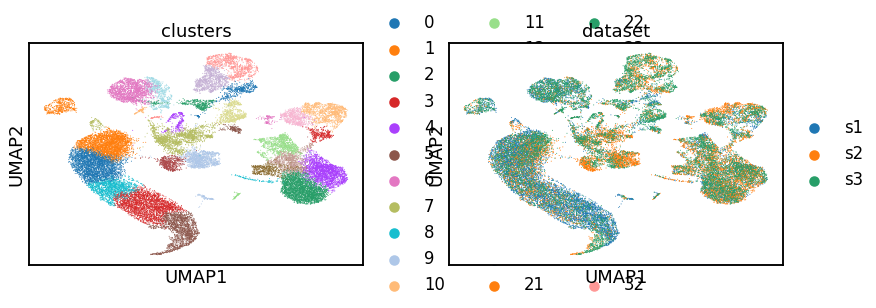

In [47]:
scanpy.pl.umap(
    alldata_corrected, color=["clusters", "dataset"], palette=scanpy.pl.palettes.default_20
)

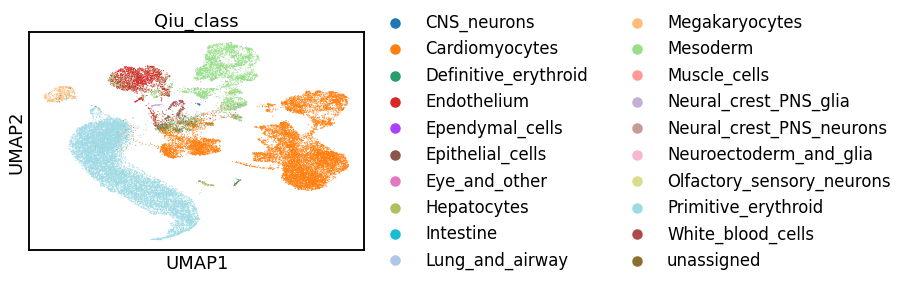

In [48]:
# scanpy.pl.umap(
#     alldata_corrected, color="KS_class", palette=scanpy.pl.palettes.default_20
# )
scanpy.pl.umap(
    alldata_corrected, color="Qiu_class", palette=scanpy.pl.palettes.default_20
)

In [51]:
# save anndata object
alldata_corrected.write_h5ad('stage9_scGEN_hvg.h5ad')

# save embeddings and clusters from Scanorama
np.savetxt('stage9_scGEN_pca_hvg.csv', alldata_corrected.obsm['corrected_latent'], delimiter=",")
np.savetxt('stage9_scGEN_umap_hvg.csv', alldata_corrected.obsm['X_umap'], delimiter=",")
pd.DataFrame(alldata_corrected.obs['clusters']).to_csv('stage9_scGEN_clusters_hvg.csv')